# The Jaynes Cummings model
Consider a single optical field mode of frequency ω coupled to a single two-level atom.


First we define the atom basis using the spinbasis function and we define the raising, the lowering operator, and the Pauli operator

In [8]:
using QuantumOptics

b_spin = SpinBasis(1//2)
sp = sigmap(b_spin); # raising operator
sm = sigmam(b_spin); # lowering operator
sz = sigmaz(b_spin); # pauli operator

Then we define the fock basis of the field and the corresponding operators

In [9]:
b_fock = FockBasis(10)
a = destroy(b_fock);
at = create(b_fock);

We can combine the Hilbert spaces with the tensor product, and we define the Jaynes Cumming Hamiltonian $H = \omega_a \frac{\sigma_z}{2}+ \omega_c a^\dagger a + \Omega(\sigma_+a + \sigma_-a^\dagger)$, we also compute the energy spectrum for the first five eigenstates

In [10]:
ωc = 0.1
ωa = 0.1
Ω = 1.0

b_product = b_fock⊗b_spin

Hatom = ωa*sz/2
Hfield = ωc*at*a
Hint = Ω*(at⊗sm + a⊗sp)
H = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint

Ev,ϕ = eigenstates((H+dagger(H))/2,5);


We can study the evolution of the initial state $\psi_0 = |0\rangle_{field}\otimes |1\rangle_{atom}$

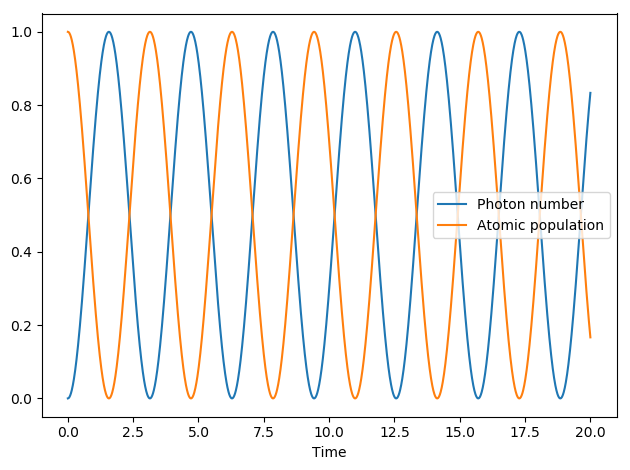

PyObject <matplotlib.legend.Legend object at 0x7f969cfee208>

In [11]:
T = [0:0.01:20;]
vacuum = basisstate(b_fock,1)
ψ0 = vacuum⊗spinup(b_spin)
tout, ψt = timeevolution.schroedinger(T, ψ0, H)

#plot of the photon number
using PyPlot
plot(tout, expect(1, at*a, ψt),label = "Photon number")
xlabel("Time")
tight_layout()

plot(tout, expect(2, sp*sm, ψt),label = "Atomic population")
xlabel("Time")
tight_layout()
legend()

We can di the same with the intial state $|\psi\rangle = |1\rangle_{field} |1\rangle_{atom}$

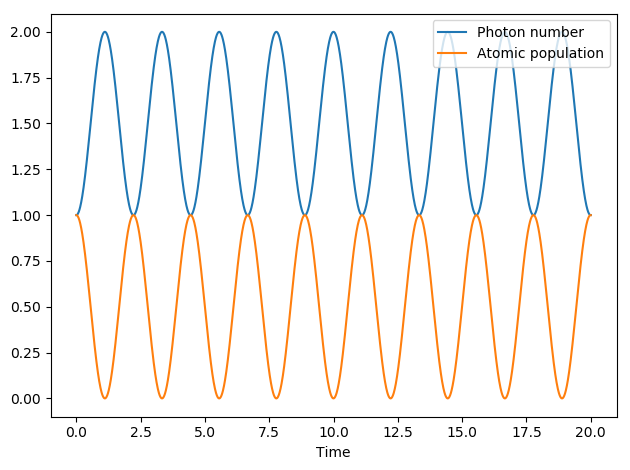

PyObject <matplotlib.legend.Legend object at 0x7f969d01c748>

In [12]:
T = [0:0.01:20;]
vacuum = basisstate(b_fock,1)
onephoton = at*vacuum
ψ0 = onephoton⊗spinup(b_spin)
tout, ψt = timeevolution.schroedinger(T, ψ0, H)

#plot of the photon number
using PyPlot
plot(tout, expect(1, at*a, ψt),label="Photon number")
xlabel("Time")
tight_layout()

plot(tout, expect(2, sp*sm, ψt), label = "Atomic population")
xlabel("Time")
tight_layout()
legend()

We can also plot the Q function ot one particular time and the photon number distribution

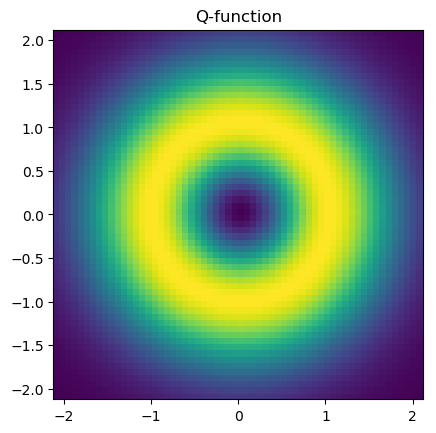

PyObject Text(0.5,1,'Q-function')

In [21]:
xv = [-3:.1:3;];yv = xv; #grid for the Q function
qα = qfunc(ptrace(ψt[200],2) ,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),real(qα))
axis("square"); title("Q-function")

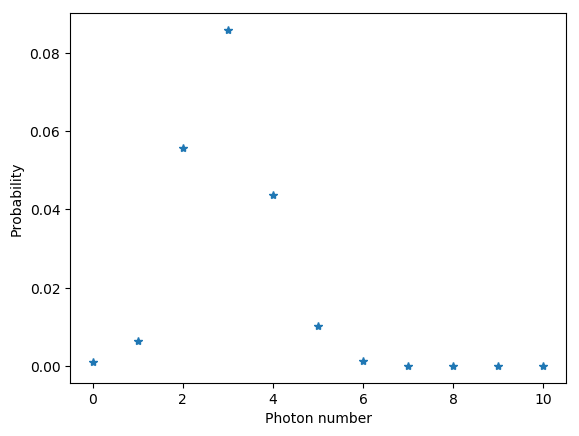

PyObject Text(24,0.5,'Probability')

In [27]:
funzione = diag(ptrace(ψt[100],2).data)
pn = abs2.(funzione)
plot([0:10;],pn,"*")
xlabel("Photon number")
ylabel("Probability")

We can do the same for an initial coherent state

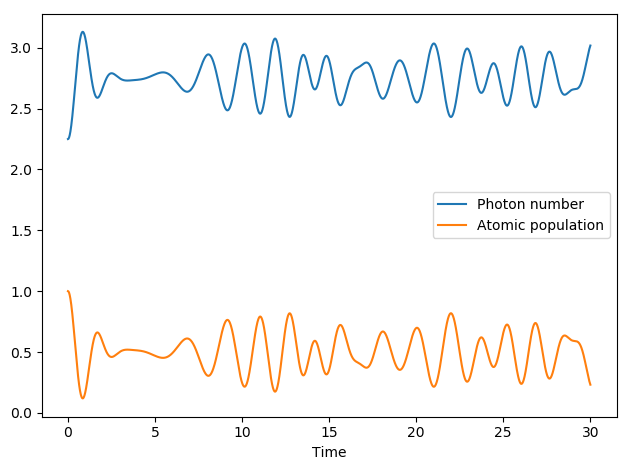

PyObject <matplotlib.legend.Legend object at 0x7f969a07d6d8>

In [24]:
α = 1.5 
ψα = coherentstate(b_fock,α)
T = [0:0.01:30;]
ψ0 = ψα⊗spinup(b_spin)
tout, ψt = timeevolution.schroedinger(T, ψ0, H)

#plot of the photon number
using PyPlot
plot(tout, expect(1, at*a, ψt),label="Photon number")
xlabel("Time")
tight_layout()


plot(tout, expect(2, sp*sm, ψt), label = "Atomic population")
xlabel("Time")
tight_layout()
legend()

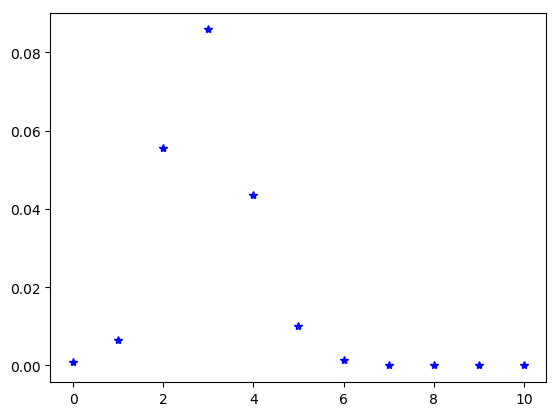

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f969cd4f5c0>

In [25]:
funzione = diag(ptrace(ψt[100],2).data)
pn = abs2.(funzione)
plot([0:10;],pn,"b*")

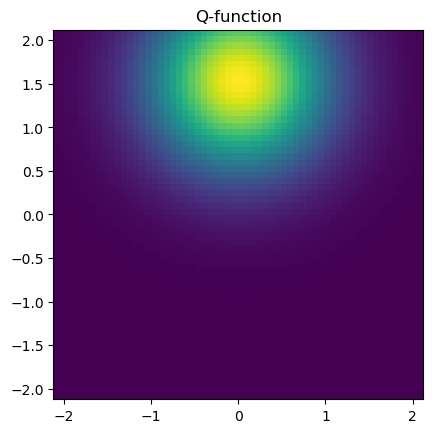

PyObject Text(0.5,1,'Q-function')

In [28]:
xv = [-3:.1:3;];yv = xv; 
qα = qfunc(ptrace(ψt[10],2) ,xv,yv)
pcolor(xv/sqrt(2),yv/sqrt(2),real(qα))
axis("square"); title("Q-function")

Now we can add a cavity to our model.We introduce a jump operator $J = \sqrt{k}a$, and we solve the master equation to obtain the dynamics

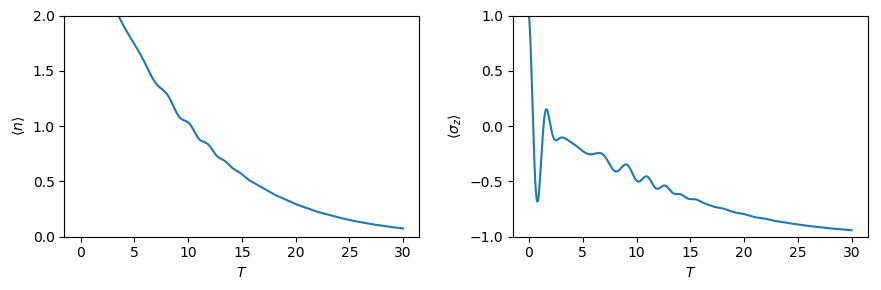

In [29]:
k = 0.5
J = [sqrt(k)*identityoperator(b_fock) ⊗ sm];
# Master
n = number(b_fock)
tout, ρt = timeevolution.master(T, ψ0, H, J)
exp_n_master = real(expect(n ⊗ identityoperator(b_spin), ρt))
exp_sz_master = real(expect(identityoperator(b_fock) ⊗ sz, ρt))

figure(figsize=(9,3))
subplot(1,2,1)
ylim([0, 2])
plot(T, exp_n_master);
xlabel(L"T")
ylabel(L"\langle n \rangle")

subplot(1,2,2)
ylim([-1, 1])
plot(T, exp_sz_master);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

We can also add a pumping field inside the cavity, we modify our Hamiltonian by adding the term $\eta(a+a^\dagger)$ and solve the dynamics

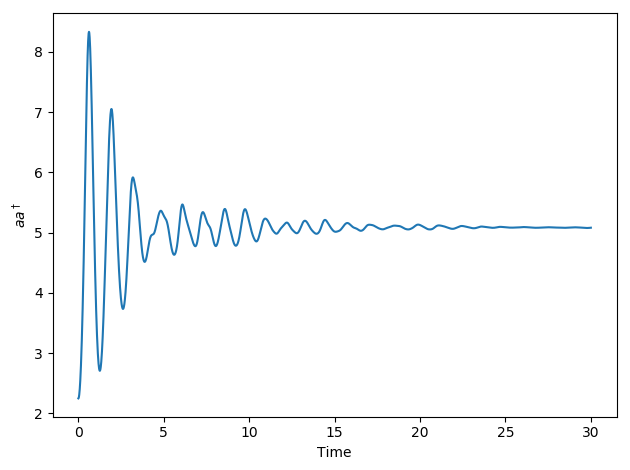

In [34]:
η = 0.9 # Pumping strength

H = H + η*(a+at)⊗identityoperator(b_spin)

Ev,ϕ = eigenstates((H+dagger(H))/2,5); #eigenstates and eigenvalues
tout, ρt = timeevolution.master(T, ψ0, H, J) #dynamics

exp_n_master = real(expect(n ⊗ identityoperator(b_spin), ρt))
exp_sz_master = real(expect(identityoperator(b_fock) ⊗ sz, ρt))

plot(T,expect(1, at*a, ρt),label="Photon number");
xlabel("Time")
ylabel(L"aa^\dagger")

tight_layout();